# Neural Network from Scratch


## Import libraries

We will be using the lower resolution MINST data set

In [1]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 

## Looking at the data

After we load the data, we print the shape of the data and a pixelated digit.

We also show what the features of one example looks like.

The neural net will learn to estimate which digit these pixels represent.

The shape of the digits dataset: (1797, 64)


<Figure size 432x288 with 0 Axes>

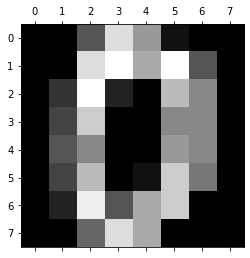

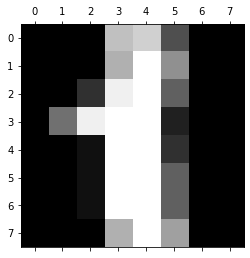

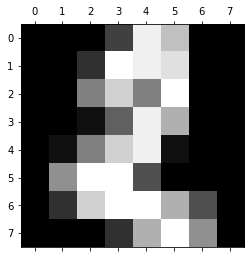

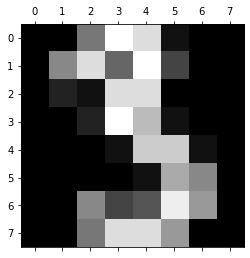

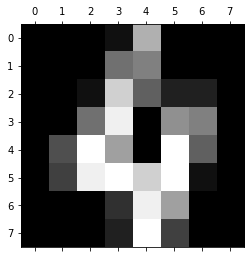

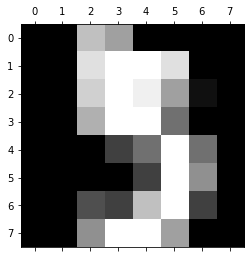

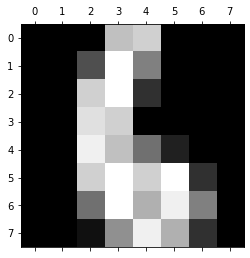

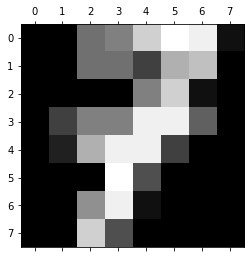

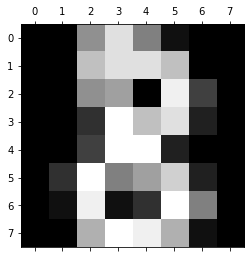

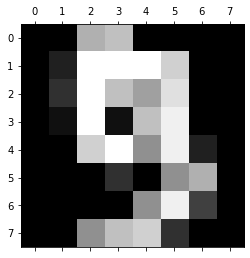

y[0:1]:

 [0]

X[0,:]:

 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [2]:
# load all the digits (img)

digits = load_digits()

# load the data from the digit (img)

data = digits.data
target = digits.target

print("The shape of the digits dataset:", digits.data.shape) 

# plot the digits
# using .gray()

plt.gray()

# # and .matshow() with argument digit.images[xx]

for i in range(10):
    plt.matshow(digits.images[i])

# # plt.show()

plt.show()

# # get the gt for this digit img

X = data
y = target

print("y[0:1]:\n\n",y[0:1])
print("\nX[0,:]:\n\n",X[0,:])

## 1) Scale the dataset
The training features range from 0 to 15.  To help the algorithm converge, we will scale the data to have a mean of 0 and unit variance

In [3]:
# use the stander lib to scale the data
# init the scaler 
scaler = StandardScaler()
# fit the data to the scaler 
scaler.fit(X)
# Looking the new features after scaling
xScaled = scaler.transform(X)

In [4]:
print("Before Scaling:\n\n", X)
print("\nAfter Scaling:\n\n", xScaled)

Before Scaling:

 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

After Scaling:

 [[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


## 2) Creating training and test datasets
We split the data into training and test data sets. We will train the neural network with the training dataset, and evaluate our neural network with the test dataset 

In [5]:
#Split the data into training and test set.  60% training and %40 test
XTrain, XTest, yTrain, yTest = train_test_split(xScaled, y, train_size = 0.6,test_size = 0.4)

## 3) Setting up the output layer

### One hot encoding

In [6]:
def convert_y_to_vect(y):
#     Our target is an integer in the range [0,..,9], so we will have 10 output neuron's in our network.  

#     If  y=0 we want the output neurons to have the values (1,0,0,0,0,0,0,0,0,0)
#     If  y=1 we want the output neurons to have the values (0,1,0,0,0,0,0,0,0,0)
#     etc

#     Thus we need to change our target so it is the same as our hoped for output of the neural network. 

#     If y=0$we change it into the vector (1,0,0,0,0,0,0,0,0,0)
#     If y=1 we change it into the vector (0,1,0,0,0,0,0,0,0,0)
#     etc

#     The code to covert the target vector.

    vectY = np.zeros((y.size, y.max()+1))
    vectY[np.arange(y.size),y] = 1   

    return vectY

Converting the training and test targets to vectors 

In [7]:
# convert digits to vectors using the func above

# appky this to both train and test splits

yTrainVect = convert_y_to_vect(yTrain)
yTestVect = convert_y_to_vect(yTest)

A quick check to see that our code performs as we expect 

In [8]:
print("Training Set of Y:\n", yTrain[0:4])
print("\n Training Set of One-Hot Y:\n",yTrainVect[0:4])

print("\nTesting Set of Y:\n", yTest[0:4])
print("\n Testing Set of One-Hot Y:\n",yTestVect[0:4])


Training Set of Y:
 [0 5 4 5]

 Training Set of One-Hot Y:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Testing Set of Y:
 [4 5 1 9]

 Testing Set of One-Hot Y:
 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 4) Creating the neural network

### The activation function and its derivative

In [9]:
# We will use the sigmoid activation function:  f(z)={1}/{1+e^{-z}}
def sig_h(z):
    return 1/(1 + np.exp(-z))

# The deriviative of the sigmoid function is: $f'(z) = f(z)(1-f(z))$ 
def sig_h_deriv(z):
    return sig_h(z)*(1-sig_h(z))


### Creating and initialing W and b


In [10]:
def setup_and_init_weights(nn_structure):
    # The weights in W are different so that during back propagation the nodes on a level will have different gradients and thus have different update values.
    #creating a dictionary for wiehgts i.e. a set of key: value pairs
    weightHash = {} 

    #creating a dictionary for bias i.e. a set of key: value pairs
    biasHash = {} 

        # We want the weights to be small values, since the sigmoid is almost "flat" for large inputs.
        # Next is the code that assigns each weight a number uniformly drawn from $[0.0, 1.0)$.  
        # The code assumes that the number of neurons in each level is in the python list *nn_structure*.
        # .random_sample return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
    
    for i in range(len(nn_structure) - 1):

        biasHash[i+1] = np.random.random_sample((nn_structure[i+1],1)) - 0.5
        weightHash[i+1] = np.random.random_sample((nn_structure[i+1], nn_structure[i])) - 0.5
        
    # Return weight and b
    return weightHash, biasHash

In [11]:
nn_structure = [64, 30, 5, 10]
weightHash, biasHash = setup_and_init_weights(nn_structure)

print("Weights:\n\n", weightHash)
print("\nBias:\n\n", biasHash)

Weights:

 {1: array([[ 0.32299676, -0.08721966,  0.01478732, ..., -0.24610747,
        -0.37658131, -0.43787066],
       [ 0.13044236,  0.43430724,  0.25320661, ..., -0.1628639 ,
         0.31336651,  0.38910416],
       [-0.05380118, -0.19632924,  0.29811154, ..., -0.25577419,
        -0.23555009,  0.17635498],
       ...,
       [-0.01578261, -0.17276815, -0.04423289, ...,  0.25012864,
        -0.38385192,  0.19745294],
       [ 0.45765807, -0.4953641 , -0.29149137, ..., -0.237703  ,
        -0.47381331,  0.0162339 ],
       [-0.27371634, -0.29439034, -0.37651263, ...,  0.19693984,
        -0.35010977,  0.03237319]]), 2: array([[-0.17414277,  0.11391287,  0.11702002,  0.44473249,  0.17643737,
         0.09407559,  0.24287029, -0.31739831, -0.46385619,  0.45913445,
        -0.45598147,  0.01050111, -0.08164   ,  0.28847277, -0.24202364,
        -0.1829409 ,  0.48274778, -0.28801368, -0.02643721,  0.34193058,
         0.3390281 ,  0.2733798 ,  0.41729004, -0.42604877, -0.15212756,
   

### Initializing $\triangledown W$ and $\triangledown b$


In [12]:
def init_tri_values(nn_structure):
    # Creating dlt_W and dlt_b to have the same size as W and b,and init the dlt_W, and dlt_b to 0
        
    # use for loop to init the dlt W and dlt b
    
        # you can use np.zeros

    dlt_W, dlt_b = {}, {}
    
    for i in range(len(nn_structure)-1):

        dlt_W[i+1] = np.zeros((nn_structure[i+1], nn_structure[i]))
        dlt_b[i+1] = np.zeros((nn_structure[i+1],1))


    return dlt_W, dlt_b

In [13]:
dlt_W, dlt_b = init_tri_values(nn_structure)

print("Delt_W:\n\n",dlt_W)
print("\nDelt_b:\n\n",dlt_b)

Delt_W:

 {1: array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 2: array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 3: array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0.

## Feed forward
Perform a forward pass throught the network.  The function returns the values of $a$ and $z$

In [14]:
def feed_forward(nn_structure,X, weightHash, biasHash, f):
    # create a dictionary for holding the a values for all levels
    aHash = {}
    # create a dictionary for holding the z values for all the layers
    zHash = {}
    # for each layer
    aHash[0] = X
    for i in range(len(nn_structure) - 1):

        zHash[i+1] = np.dot(weightHash[i+1],aHash[i]) + biasHash[i+1]
        aHash[i+1] = f(zHash[i+1])                        

    return aHash, zHash

## Compute $\delta$
compute $\delta^{(s_l)}$ in a function called "calculate_out_layer_delta",  and  computes $\delta^{(\ell)}$ for the hidden layers in the function called "calculate_hidden_delta".  



In [15]:
def calculate_out_layer_delta(y, a_out, z_out, f_deriv):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out)*f_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l,f_deriv):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.matmul(w_l.T, delta_plus_1) * f_deriv(z_l)

## The Back Propagation Algorithm


In [16]:
def train_nn(f, f_deriv, nn_structure, X, y, iter_num=3000, alpha=0.25):
    # init W and b
    W, b = setup_and_init_weights(nn_structure)
    # init counter to 0
    cnt = 0
    # store the length of data
    dataLen = X.shape[0]
    # init a list to store the all costs
    costList = []

    print('Starting gradient descent for {} iterations'.format(iter_num))
    # while the counter is less than the max iterations:
    while cnt < iter_num:
        # print the iteration number for every 1000 iter
        if cnt % 100 == 0 :
            print("Iteration:", cnt)
        # init delt_W and delt_b
        delt_W, delt_b = init_tri_values(nn_structure)
        # init the cost to 0
        lossFunc = 0
        # for each data:
        for i in range(dataLen):

            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            Y = y[i][:, np.newaxis]
            x = X[i][:, np.newaxis]
            
            a, z = feed_forward(nn_structure,x, W, b, f)
            lossFunc += np.sum((Y-a[len(nn_structure)-1])**2)

            # loop from nl-1 to 1 backpropagating the errors
            for j in range(len(nn_structure)-1,0,-1):
                if j == len(nn_structure) - 1:
                    deltas = calculate_out_layer_delta(Y,a[len(nn_structure)-1],z[len(nn_structure)-1],f_deriv)
                else:
                    deltas = calculate_hidden_delta(deltas, W[j+1], z[j],f_deriv)
                delt_W[j] += np.matmul(deltas,a[j-1].T)    
                delt_b[j] += deltas    
                    
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                        # hit: you can use np.newaxis to increase the number of dimensions
                        
                    # trib^(l) = trib^(l) + delta^(l+1)

                
        # perform the gradient descent step for the weights in each layer
        for k in range(len(nn_structure)-1):

            W[k+1] -= alpha*delt_W[k+1]/dataLen
            b[k+1] -=  alpha*delt_b[k+1]/dataLen
        
        # complete the average cost (mean squared error) calculation
        lossFunc /= dataLen 
        # append the cost to the cost list

        costList.append(lossFunc)
        # increase the counter 
        cnt+=1
        
    return W,b,costList

In [17]:
def predict_y(W, b, X, nn_structure, f):
    # store the length of data
    dataLen = X.shape[0]
    # init for prediction array
    predictionArray = []
    # for each data:
    for i in range(dataLen):
        # feed forward
        x = X[i][:, np.newaxis]
        a,z = feed_forward(nn_structure,x,W,b,f)
        
        # predict
        prediction = np.argmax(a[len(nn_structure)-1])
        predictionArray.append(prediction)
    return predictionArray

## Running the neural network

Our code assumes the size of each layer in our network is held in a list.  The input layer will have 64 neurons (one for each pixel in our 8 by 8 pixelated digit).  Our hidden layer has 30 neurons (you can change this value).  The output layer has 10 neurons.

Next we create the python list to hold the number of neurons for each level and then run the neural network code with our training data.

This code will take some time...

In [ ]:
iter_num = 3000
nn_structure = [64, 50, 30, 10] 
    
# train the NN with the nn_structure and 3000 iterations

W, b, costList = train_nn(sig_h,sig_h_deriv,nn_structure, XTrain, yTrainVect, iter_num)


Starting gradient descent for 3000 iterations
Iteration: 0
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Iteration: 1700
Iteration: 1800
Iteration: 1900
Iteration: 2000
Iteration: 2100
Iteration: 2200
Iteration: 2300
Iteration: 2400


### Plotting Learning Curve - Sigmoid Activation

In [ ]:
# plot the avg_cost_func 
x = [i for i in range(iter_num)]
plt.plot(x, costList)
# x label: "Iteration number"
plt.xlabel('Iteration Number')
# y label: "Average J"
plt.ylabel('Average MSE')

plt.show()

## 5) Assessing Accuracy - Sigmoid Activation
Next we determine what percentage the neural network correctly predicted the handwritten digit correctly on the test set

In [ ]:
# get the prediction accuracy and print
yPred = predict_y(W,b,XTest,nn_structure,sig_h)
print('Prediction accuracy [Sigmoid Activation] is {}%'.format(accuracy_score(yTest, yPred) * 100))

### Activation Functions

In [ ]:
def ReLu_f(z):
    return np.amax(z, axis=1, initial=0)[:, np.newaxis]
def ReLu_f_deriv(z):
    return (z>0).astype(int)

def tanh_f (z):
    return 2.0 / (1 + np.exp(-2*z)) - 1
def tanh_f_deriv (z):
    z_ = np.exp(-2*z)
    return 1 - tanh_f(z)**2

In [ ]:
iter_num = 3000
nn_structure = [64, 50, 30, 10] 
print("Tanh Activation:")
W, b, costList = train_nn(tanh_f, tanh_f_deriv, nn_structure, XTrain, yTrainVect, iter_num)


### Plotting Learning Curve - Tanh Activation 

In [ ]:
# plot the avg_cost_func 
x = [i for i in range(iter_num)]
plt.plot(x, costList)
# x label: "Iteration number"
plt.xlabel('Iteration Number')

# y label: "Average J"
plt.ylabel('Average MSE')

plt.show()

### Assesing Accuracy - Tanh Activation 

In [ ]:
yPred = predict_y(W,b,XTest,nn_structure,tanh_f)
print('Prediction accuracy [tanh Activation] is {}%'.format(accuracy_score(yTest, yPred) * 100))

In [ ]:
iter_num = 3000
nn_structure = [64, 50, 30, 10] 
print("ReLu Activation:")
W, b, costList = train_nn(ReLu_f, ReLu_f_deriv, nn_structure, XTrain, yTrainVect, iter_num)


### Plotting Learning Curve - ReLu Activation 

In [ ]:
# plot the avg_cost_func 

x = [i for i in range(iter_num)]
plt.plot(x, costList)
# x label: "Iteration number"
plt.xlabel('Iteration Number')

# y label: "Average J"
plt.ylabel('Average MSE')

plt.show()

### Assesing Accuracy - ReLu Activation 

In [ ]:
yPred = predict_y(W,b,XTest,nn_structure,ReLu_f)
print('Prediction accuracy [ReLu Activation] is {}%'.format(accuracy_score(yTest, yPred) * 100))

The best activation function was the Tan(h) activation function as it, on average, has the greatest accuracy. It is, however, only slightly better than the Sigmoid activation function by approximately 0.01%-0.03%. The ReLu activation function was by far the worst as it had the lowest overall accuracy and did not seem to learn very much after the first few iterations. 

## Tweaking Hyperparameters

In [ ]:
iter_num = 3000
nn_structure = [64, 30, 10] 
print("Tanh Activation:")

W, b, costList = train_nn(tanh_f, tanh_f_deriv, nn_structure, XTrain, yTrainVect, iter_num,0.35)


In [ ]:
# plot the avg_cost_func 

x = [i for i in range(iter_num)]
plt.plot(x, costList)
# x label: "Iteration number"
plt.xlabel('Iteration Number')

# y label: "Average J"
plt.ylabel('Average MSE')

plt.show()

In [ ]:
yPred = predict_y(W,b,XTest,nn_structure,tanh_f)
print('Prediction accuracy [ReLu Activation] is {}%'.format(accuracy_score(yTest, yPred) * 100))

In [ ]:
iter_num = 3000
nn_structure = [64, 30, 10] 
print("Tanh Activation:")

W, b, costList = train_nn(sig_h, sig_h_deriv, nn_structure, XTrain, yTrainVect, iter_num,0.35)
